# CONSUMER PRICE INDEX

``Consumer Price Index (CPI)`` Analysis involves tracking the average price change over time for a basket of goods and services typically consumed by households. It serves as a primary measure of inflation, which helps companies and governments understand purchasing power trends, inflationary pressures, and economic stability. So, if you want to understand how to analyze the Consumer Price Index, this article is for you. In this article, I’ll take you through the task of Consumer Price Index Analysis with Python.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import detrend
import plotly.graph_objects as go

In [107]:
df=pd.read_csv(r"C:\Users\Sai Rohit Basantam\Downloads\cpi.csv")

In [108]:
df.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [109]:
df.columns

Index(['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish',
       'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [110]:
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [111]:
df.columns

Index(['sector', 'year', 'month', 'cereals_and_products', 'meat_and_fish',
       'egg', 'milk_and_products', 'oils_and_fats', 'fruits', 'vegetables',
       'pulses_and_products', 'sugar_and_confectionery', 'spices',
       'non-alcoholic_beverages', 'prepared_meals,_snacks,_sweets_etc.',
       'food_and_beverages', 'pan,_tobacco_and_intoxicants', 'clothing',
       'footwear', 'clothing_and_footwear', 'housing', 'fuel_and_light',
       'household_goods_and_services', 'health', 'transport_and_communication',
       'recreation_and_amusement', 'education', 'personal_care_and_effects',
       'miscellaneous', 'general_index'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sector                               365 non-null    object 
 1   year                                 365 non-null    int64  
 2   month                                365 non-null    object 
 3   cereals_and_products                 362 non-null    float64
 4   meat_and_fish                        359 non-null    float64
 5   egg                                  362 non-null    float64
 6   milk_and_products                    362 non-null    float64
 7   oils_and_fats                        362 non-null    float64
 8   fruits                               362 non-null    float64
 9   vegetables                           362 non-null    float64
 10  pulses_and_products                  362 non-null    float64
 11  sugar_and_confectionery         

In [113]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November ', 'November',
       'December', 'Marcrh'], dtype=object)

During the initial analysis of this dataset, I found that some of the month values contain extra whitespace, which can cause errors in parsing. So,     I’ll clean up the data before the data conversion to ensure smooth analysis. I also noticed a typo in the Month column, such as “Marcrh” instead of     “March”. I’ll check for such inconsistencies, correct them, and then proceed with the analysis:

In [114]:
df['month']=df['month'].str.strip()
df['month']=df['month'].str.replace("Marcrh","March")
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%B')
df['month'].unique()  

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

# Inflation Trend Analysis
Now, I will analyze the general CPI index over time for the Rural+Urban sector This will help identify periods when prices increased rapidly or remained stable.

In [115]:
rural_urban_cpi = df[df['sector'] == "Rural+Urban"].sort_values('date')

In [116]:
rural_urban_cpi

,sector,year,month,cereals_and_products,meat_and_fish,egg,milk_and_products,oils_and_fats,fruits,vegetables,...,fuel_and_light,household_goods_and_services,health,transport_and_communication,recreation_and_amusement,education,personal_care_and_effects,miscellaneous,general_index,date
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3,2013-02-01
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5,2013-03-01
11,Rural+Urban,2013,April,111.6,110.9,106.6,105.7,104.4,108.9,105.5,...,106.5,106.3,105.3,104.7,104.2,105.0,102.9,104.8,106.1,2013-04-01
14,Rural+Urban,2013,May,112.3,111.3,104.7,106.8,103.9,109.3,112.9,...,107.4,106.9,105.9,104.0,104.8,105.6,102.3,104.8,106.9,2013-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,Rural+Urban,2022,October,165.2,210.9,170.9,170.9,186.5,163.8,199.7,...,180.5,170.4,178.7,162.9,168.2,173.4,172.1,170.5,176.7,2022-10-01
353,Rural+Urban,2022,November,167.4,209.4,181.4,172.3,188.9,160.7,183.1,...,181.3,171.4,179.8,163.0,168.5,173.7,173.6,171.1,176.5,2022-11-01
356,Rural+Urban,2022,December,169.2,209.0,190.2,173.6,188.5,158.0,159.9,...,182.0,172.1,181.1,163.4,168.9,174.1,175.8,172.0,175.7,2022-12-01
359,Rural+Urban,2023,January,173.8,210.7,194.5,174.6,187.2,158.3,153.9,...,182.0,172.9,182.3,163.6,169.5,174.3,178.6,172.8,176.5,2023-01-01


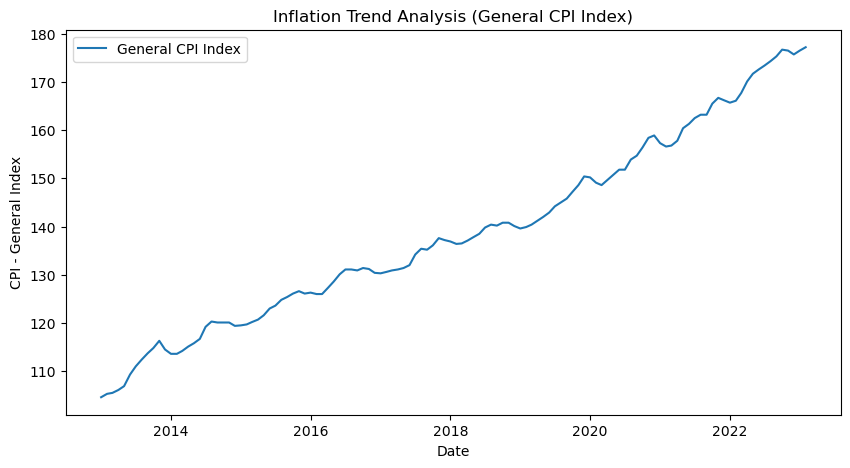

In [117]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Create the plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=rural_urban_cpi, x='date', y='general_index', label='General CPI Index')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('CPI - General Index')
plt.title('Inflation Trend Analysis (General CPI Index)')
plt.legend()

# Show the plot
plt.show()


From around 2013 to 2023, there is a steady increase in the CPI in India, which reflects a continuous rise in inflation. The general upward trend suggests that the cost of goods and services has gradually increased over this period, with occasional fluctuations. The sharp rise in the last few years points to a significant inflationary impact, especially around and after 2020.

# Seasonal and Cyclical Patterns
- Now, I’ll decompose the CPI data into seasonal, trend, and residual components to identify patterns:

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose


rural_urban_cpi.set_index('date', inplace=True)
monthly_cpi = rural_urban_cpi['general_index'].resample('M').mean().interpolate(method='linear')
decomposition = seasonal_decompose(monthly_cpi, model='multiplicative', period=12)

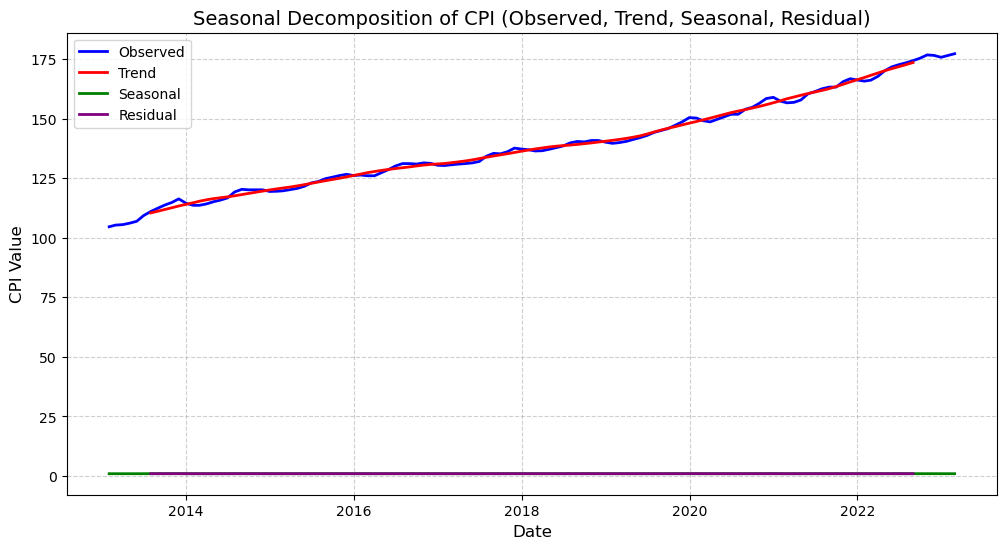

In [119]:
plt.figure(figsize=(12, 6))

plt.plot(decomposition.observed, label="Observed", color='blue', linewidth=2)
plt.plot(decomposition.trend, label="Trend", color='red', linewidth=2)
plt.plot(decomposition.seasonal, label="Seasonal", color='green', linewidth=2)
plt.plot(decomposition.resid, label="Residual", color='purple', linewidth=2)

# Formatting the plot
plt.title("Seasonal Decomposition of CPI (Observed, Trend, Seasonal, Residual)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("CPI Value", fontsize=12)
plt.legend()  # Show labels
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

The trend line (in red) closely follows the observed CPI values, which indicates a steady upward trend over time. The seasonal component (in green) is minimal, which suggests little seasonal fluctuation in the CPI. The residual component (in purple) is close to zero, which indicates minimal random variation, which implies that the CPI trend is consistent and primarily driven by long-term factors rather than seasonal or irregular influences.

# Comparison Across Sectors or Regions

- Now, let’s compare the average CPI across different sectors (Rural, Urban, Rural+Urban):

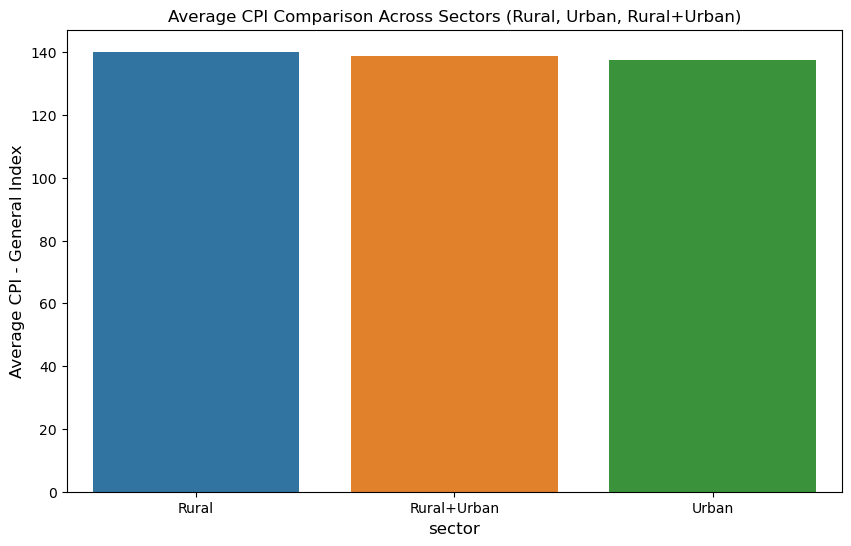

In [120]:
sector_cpi_mean = df.groupby(['sector'])['general_index'].mean().reset_index()


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sector_cpi_mean, x='sector', y='general_index')

# Add labels and title
plt.xlabel("sector", fontsize=12)
plt.ylabel("Average CPI - General Index", fontsize=12)
plt.title("Average CPI Comparison Across Sectors (Rural, Urban, Rural+Urban)")

# Show the plot
plt.show()

The CPI values are relatively consistent across all sectors, with only slight differences, which indicates that inflation, as measured by the CPI, affects rural and urban areas similarly. This suggests that price changes in goods and services are fairly uniform across these regions.

In [121]:
cpi_categories = df[['cereals_and_products', 'meat_and_fish', 'egg', 'milk_and_products', 'oils_and_fats',
                           'fruits', 'vegetables', 'fuel_and_light', 'housing', 'health', 'transport_and_communication',
                           'recreation_and_amusement', 'education', 'personal_care_and_effects', 'miscellaneous', 'general_index']]

cpi_categories = cpi_categories.apply(pd.to_numeric, errors='coerce')  # convert to numeric

In [122]:
cpi_categories

,cereals_and_products,meat_and_fish,egg,milk_and_products,oils_and_fats,fruits,vegetables,fuel_and_light,housing,health,transport_and_communication,recreation_and_amusement,education,personal_care_and_effects,miscellaneous,general_index
0,107.5,106.3,108.1,104.9,106.1,103.9,101.9,105.5,NaN,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,110.5,109.1,113.0,103.6,103.4,102.3,102.9,105.4,100.3,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,108.4,107.3,110.0,104.4,105.1,103.2,102.2,105.5,100.3,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,109.2,108.7,110.2,105.4,106.7,104.0,102.4,106.2,NaN,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,112.9,112.9,116.9,104.0,103.5,103.1,104.9,105.7,100.4,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,174.2,205.2,173.9,177.0,183.4,167.2,140.9,181.6,NaN,186.6,169.0,172.8,178.5,180.7,177.9,178.0
361,174.7,212.2,177.2,177.9,172.2,172.1,175.8,182.8,173.5,180.8,159.8,168.4,172.5,181.4,170.0,176.3
362,174.4,207.7,175.2,177.3,179.3,169.5,152.7,182.1,173.5,184.4,164.2,170.3,175.0,181.0,174.1,177.2
363,174.3,205.2,173.9,177.0,183.3,167.2,140.9,181.4,NaN,186.6,169.0,172.8,178.5,180.7,177.9,178.0


In [123]:
correlation_matrix = cpi_categories.corr()

In [124]:
correlation_matrix

,cereals_and_products,meat_and_fish,egg,milk_and_products,oils_and_fats,fruits,vegetables,fuel_and_light,housing,health,transport_and_communication,recreation_and_amusement,education,personal_care_and_effects,miscellaneous,general_index
cereals_and_products,1.000000,0.936088,0.920298,0.978281,0.835740,0.904204,0.582257,0.936357,0.963590,0.952303,0.913571,0.952961,0.952354,0.965539,0.954863,0.969758
meat_and_fish,0.936088,1.000000,0.958486,0.948047,0.929413,0.893158,0.614168,0.932032,0.944540,0.968236,0.961164,0.966051,0.941889,0.986152,0.972195,0.975611
egg,0.920298,0.958486,1.000000,0.927769,0.902606,0.846174,0.608180,0.912386,0.931014,0.946648,0.936133,0.940178,0.920434,0.964577,0.949330,0.954838
milk_and_products,0.978281,0.948047,0.927769,1.000000,0.856929,0.941188,0.577734,0.945304,0.981278,0.967199,0.918134,0.971093,0.977767,0.964898,0.967568,0.985070
oils_and_fats,0.835740,0.929413,0.902606,0.856929,1.000000,0.808059,0.460572,0.927878,0.851395,0.920110,0.971347,0.917494,0.847736,0.921764,0.931460,0.914509
fruits,0.904204,0.893158,0.846174,0.941188,0.808059,1.000000,0.553701,0.891488,0.936356,0.895997,0.853697,0.903154,0.910832,0.891989,0.897843,0.924992
vegetables,0.582257,0.614168,0.608180,0.577734,0.460572,0.553701,1.000000,0.493003,0.634510,0.547994,0.524637,0.548237,0.571334,0.594531,0.553092,0.616267
fuel_and_light,0.936357,0.932032,0.912386,0.945304,0.927878,0.891488,0.493003,1.000000,0.927042,0.976021,0.967982,0.978188,0.942411,0.955313,0.977670,0.969113
housing,0.963590,0.944540,0.931014,0.981278,0.851395,0.936356,0.634510,0.927042,1.000000,0.974505,0.907393,0.973939,0.994764,0.964413,0.970385,0.980883
health,0.952303,0.968236,0.946648,0.967199,0.920110,0.895997,0.547994,0.976021,0.974505,1.000000,0.972382,0.997594,0.981640,0.985409,0.998284,0.990248


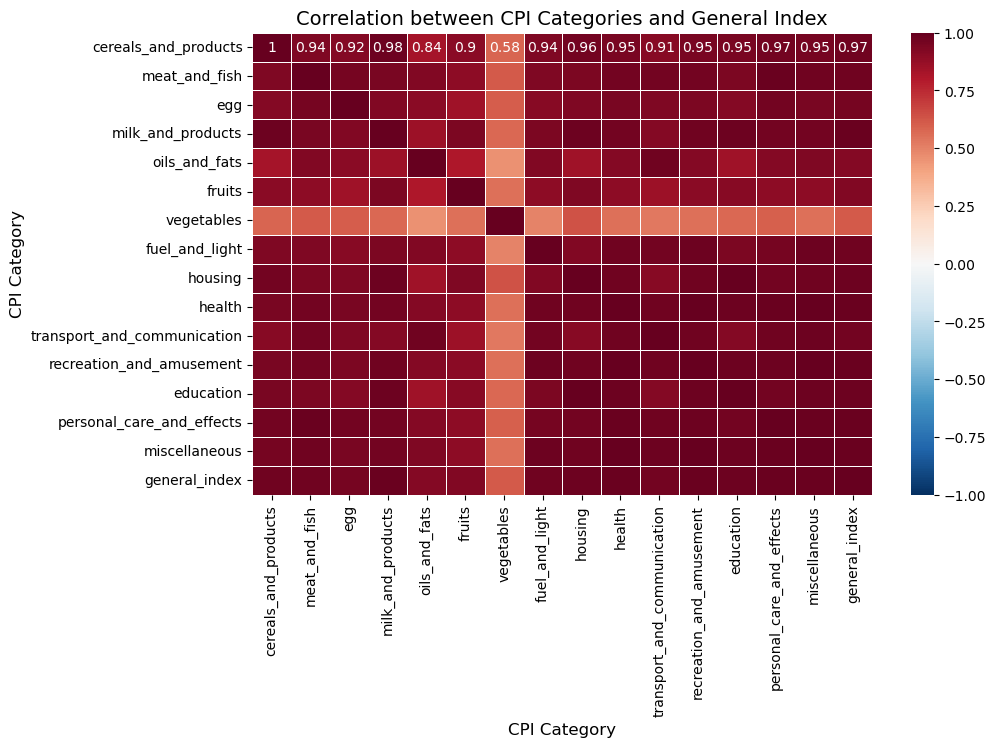

In [125]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, linewidths=0.5)

# Add labels and title
plt.xlabel("CPI Category", fontsize=12)
plt.ylabel("CPI Category", fontsize=12)
plt.title("Correlation between CPI Categories and General Index", fontsize=14)

# Show the plot
plt.show()


Categories such as Housing, Transport and communication, and Miscellaneous show high positive correlations with each other and with the overall index, which suggests that changes in these categories have a significant impact on the general CPI. Conversely, categories like Egg and Vegetables show relatively lower correlations with other categories, which indicates more independent or variable price movements in these areas.

# CPI and Specific Sector Analysis

- Now, let’s analyze the inflation trends within specific sectors over time:

In [126]:
sectors_to_analyze = ['fuel_and_light', 'health', 'housing', 'cereals_and_products']
sector_data = rural_urban_cpi[sectors_to_analyze].fillna(method='ffill').reset_index()

In [127]:
sector_data

,date,fuel_and_light,health,housing,cereals_and_products
0,2013-01-01,105.5,104.0,100.3,108.4
1,2013-02-01,106.0,104.5,100.4,110.4
2,2013-03-01,106.1,104.9,100.4,111.4
3,2013-04-01,106.5,105.3,100.5,111.6
4,2013-05-01,107.4,105.9,100.5,112.3
...,...,...,...,...,...
116,2022-10-01,180.5,178.7,171.2,165.2
117,2022-11-01,181.3,179.8,171.8,167.4
118,2022-12-01,182.0,181.1,170.7,169.2
119,2023-01-01,182.0,182.3,172.1,173.8


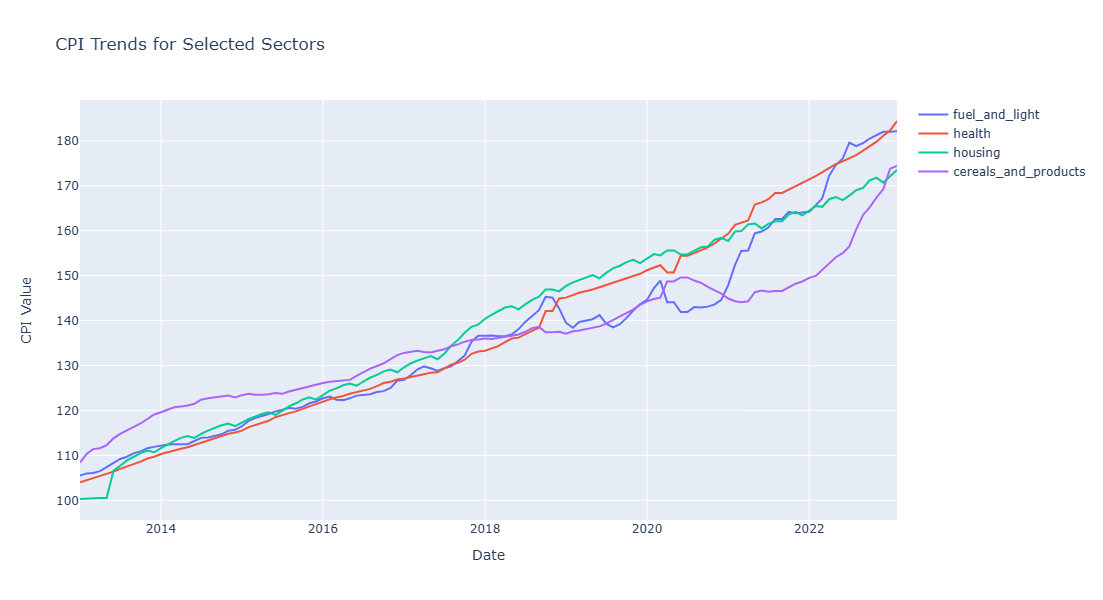

In [130]:
fig = go.Figure()

# Loop through each sector and add a trace
for sector in sectors_to_analyze:
    fig.add_trace(go.Scatter(x=sector_data['date'], y=sector_data[sector], mode='lines', name=sector))

# Update layout with increased figure size
fig.update_layout(
    title='CPI Trends for Selected Sectors',
    xaxis_title='Date',
    yaxis_title='CPI Value',
    width=1100,  # Increase width
    height=600   # Increase height
)

# Show the figure
fig.show()


Each sector shows a general upward trend over time, which indicates rising prices. Fuel and light have experienced the steepest increase, particularly after 2020, which reflectes higher inflation in this category. Health and Housing have followed a more gradual, steady increase over the years, with Health showing a relatively consistent rise. Cereals and products, while generally increasing, show more fluctuations, particularly around 2020, which indicates price volatility in this category.

# Event-Based Analysis (COVID-19 Periods)
- Now, let’s analyze CPI trends specifically during the COVID-19 period (2020-2021):

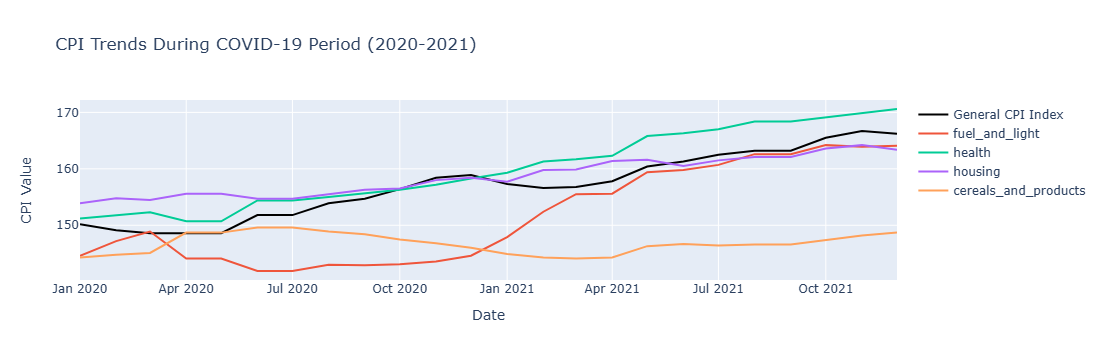

In [135]:
# event-based analysis (COVID-19 Period)
covid_period = rural_urban_cpi[(rural_urban_cpi.index >= '2020-01-01') & (rural_urban_cpi.index <= '2021-12-31')][sectors_to_analyze + ['general_index']].fillna(method='ffill').reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_period['date'], y=covid_period['general_index'], mode='lines', name='General CPI Index', line=dict(width=2, color='black')))
for sector in sectors_to_analyze:
    fig.add_trace(go.Scatter(x=covid_period['date'], y=covid_period[sector], mode='lines', name=sector))
fig.update_layout(title='CPI Trends During COVID-19 Period (2020-2021)', xaxis_title='Date', yaxis_title='CPI Value')
fig.show()

The Health and Housing sectors experienced notable increases, with Health showing a steady rise and Housing seeing a sharper increase from early 2021. Fuel and light saw a significant decline in early 2020, possibly due to reduced demand during lockdowns, followed by a steep rise in 2021 as economic activities resumed. Cereals and products remained relatively stable with minor fluctuations. Overall, the graph reflects the varied inflationary impacts of COVID-19 across these sectors, with essentials like health and housing showing resilience and growth.



The key findings from the CPI analysis are as follows:

- **Overall Inflation Trend**     : There has been a steady increase in the CPI over the past decade, with inflation particularly rising after 2020.
- **Minimal Seasonal Effect**     : The seasonal decomposition shows minimal seasonal fluctuations, indicating that CPI trends are mainly driven by                                         long-term factors.
- **Rural vs Urban Impact**       : Inflation levels are consistent across rural, urban, and combined sectors, suggesting uniform price changes in                                          these regions.
- **Sectoral Correlations**       : High correlations are observed between sectors like housing, transport, and miscellaneous, indicating their                                             significant impact on overall inflation, while categories like eggs and vegetables show more independent price                                          movements.
- **Sector-Specific Trends**      : Fuel and light have experienced the steepest price increase, especially post-2020, while health and housing show                                        steady inflation growth. Cereals and products display more volatility.
- **COVID-19 Impact (2020-2021)** : During the pandemic, fuel prices initially dropped due to lower demand, then surged in 2021. Health and housing                                         sectors saw consistent price increases, reflecting inflationary pressures on essential services during this period.